In [22]:
import csv
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv(r"D:\Datasets\netflix_dataset.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [2]:
df.shape

(7787, 12)

In [3]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [4]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [5]:
#Calcualting Null values

In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [7]:
#Dealing with null values

In [8]:
df.director=df.director.fillna("No Data")
df.cast =df.cast .fillna("No Data")
df.country=df.country.fillna(df.country.mode)
df.date_added=df.date_added.fillna(df.date_added.mode)
df.rating =df.rating.fillna(df.rating.mode)
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [9]:
#Percentage of TV Shows and Movies

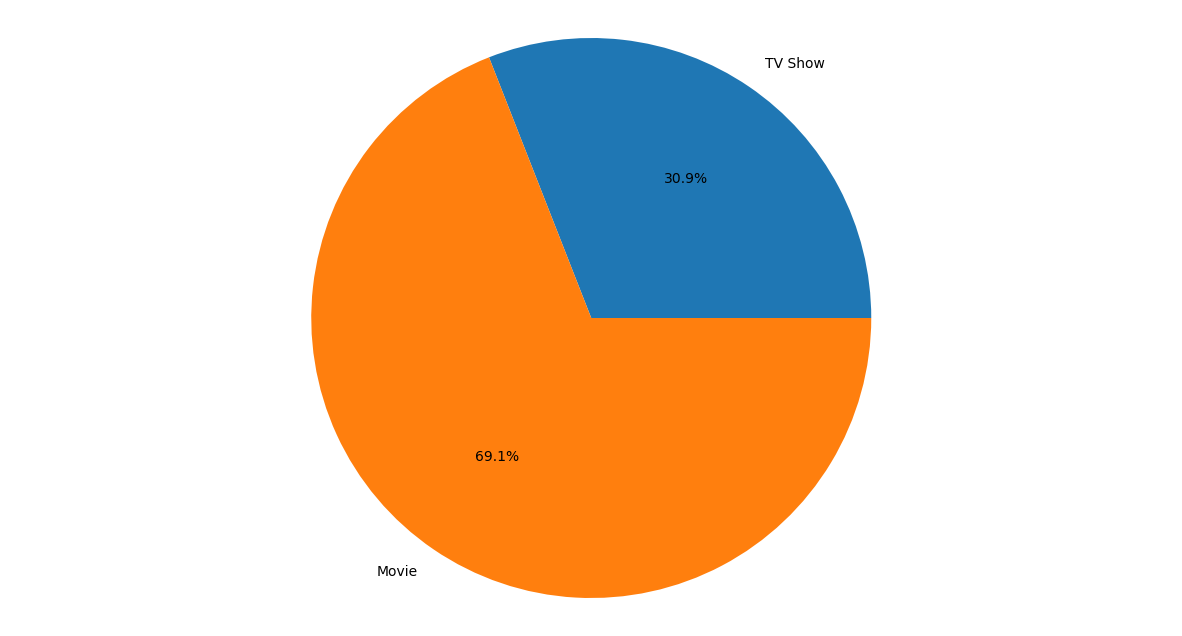

(69.1, 30.9)


In [10]:
plt.figure(figsize=(15, 8))
label = ['TV Show', 'Movie']
plt.pie(df['type'].value_counts().sort_values(), labels=label, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

# Calculate the percentages of TV shows and Movies
tv_show_percentage = (df['type'].value_counts(normalize=True)['TV Show'] * 100).round(1)
movie_percentage = (df['type'].value_counts(normalize=True)['Movie'] * 100).round(1)

# Print the output as a tuple
print((movie_percentage, tv_show_percentage))

In [ ]:
#Top 10 countries with most number of content

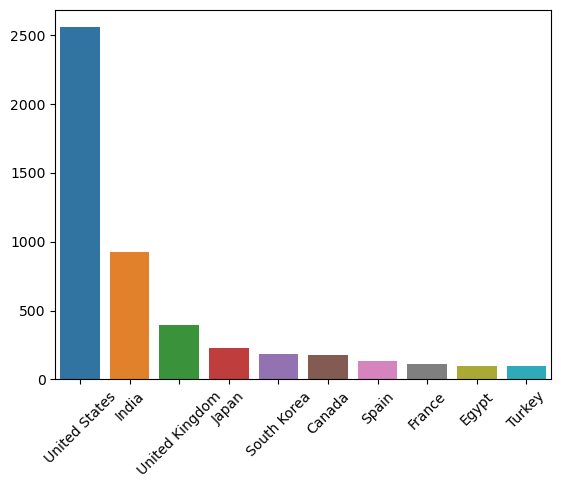

('United States', 2555)


In [23]:
df1=df['country'].value_counts()[0:10]
sns.barplot(x=df1.index,y=df1.values)
plt.xticks(rotation=45)
plt.show()
print((df1.index[0],df1.values[0]))



In [ ]:
#Number of content Added over the years

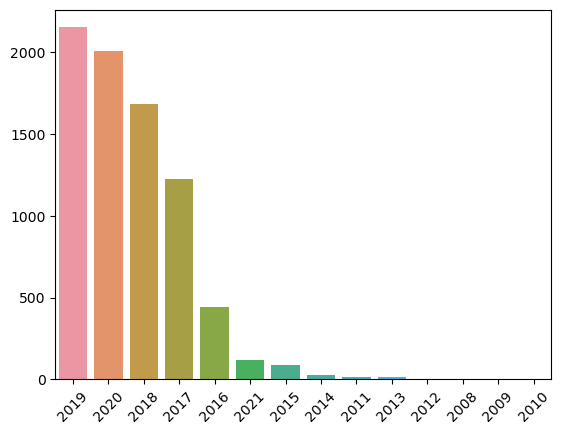

2019


In [27]:
df2=df.date_added.str.split(', ',expand = True)[1]
df2 = df2.value_counts()
sns.barplot(x=df2.index,y=df2.values)
plt.xticks(rotation=45)
plt.show()
print(df2.index[0])

In [ ]:
#Most popular content in India with respect to content type and rating

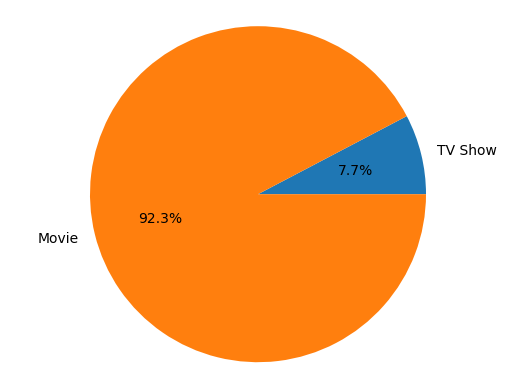

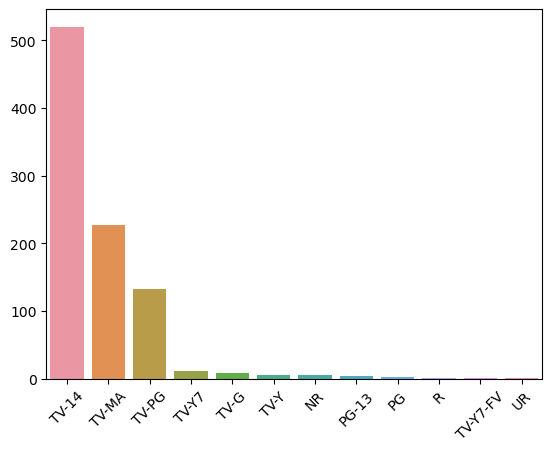

('Movie', 'TV-14')


In [30]:
df3=df[df.country=='India']
# plt.figure(figsize=(15, 8))
label = ['TV Show', 'Movie']
plt.pie(df3['type'].value_counts().sort_values(), labels=label, autopct='%1.1f%%')
plt.axis('equal')
plt.show()
sns.barplot(x=df3.rating.value_counts().index,y=df3.rating.value_counts().values)
plt.xticks(rotation=45)
plt.show()
print(('Movie',df3.rating.value_counts().index[0]))

In [31]:
df4=df[df['type']=='Movie']
df4['duration']=df4['duration'].str.split(' ',expand = True)[0]
df4['duration']=pd.to_numeric(df4['duration'])

# Find the movie with the longest duration
longest_movie = df4[df4['duration'] == df4['duration'].max()]
movie_title = longest_movie['title'].values[0]
release_year = longest_movie['release_year'].values[0]

# Print the output
print((movie_title, release_year))

('Black Mirror: Bandersnatch', 2018)


C:\Users\athar\AppData\Local\Temp\ipykernel_19712\4261764384.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['duration']=df4['duration'].str.split(' ',expand = True)[0]
C:\Users\athar\AppData\Local\Temp\ipykernel_19712\4261764384.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['duration']=pd.to_numeric(df4['duration'])
